In [23]:
import os
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [24]:
# %connect_info
%qtconsole

In [25]:
os.chdir('/Users/cgu3/Documents/data')

In [26]:
pwd

'/Users/cgu3/Documents/data'

In [27]:
# Define the regular expression
pattern = re.compile(r'.*_with_protein_probability\.csv$')

# Get a list of all files in the current directory
files = os.listdir()

# Filter the list of files to only include those that match the regular expression
matching_files = [file for file in files if pattern.match(file)]

# Print the list of matching files
print(matching_files)

['SG_combined_protein_0993_with_protein_probability.csv', 'SG_combined_protein_7105_with_protein_probability.csv', 'SG_combined_protein_7103_with_protein_probability.csv', 'SG_combined_protein_0995_with_protein_probability.csv', 'SG_combined_protein_7100_with_protein_probability.csv', 'SG_combined_protein_0981_with_protein_probability.csv', 'SG_combined_protein_0982_with_protein_probability.csv', 'SG_combined_protein_0999_with_protein_probability.csv']


In [28]:
csv_files = []
i = 0
for file in matching_files:
    csv_file = pd.read_csv(file)
    csv_file.rename(columns={'protein_probability': 'protein_probability' + str(i)}, inplace=True)
    csv_files.append(csv_file)
    i += 1

In [29]:
 matching_files

['SG_combined_protein_0993_with_protein_probability.csv',
 'SG_combined_protein_7105_with_protein_probability.csv',
 'SG_combined_protein_7103_with_protein_probability.csv',
 'SG_combined_protein_0995_with_protein_probability.csv',
 'SG_combined_protein_7100_with_protein_probability.csv',
 'SG_combined_protein_0981_with_protein_probability.csv',
 'SG_combined_protein_0982_with_protein_probability.csv',
 'SG_combined_protein_0999_with_protein_probability.csv']

In [30]:
csv_files[0].head()

,protein.Accession,protein_probability0
0,A0A024RBG1,0.999992
1,A0A075B6J2,0.939846
2,A0A075B6K0,0.991211
3,A0A075B6K2,0.331800
4,A0A075B6K4,0.469839


In [31]:
joined_file = reduce(lambda left,right: pd.merge(left,right,on='protein.Accession'), csv_files)

In [32]:
joined_file['max'] = joined_file.iloc[:, 1:].mean(axis=1)
joined_file

,protein.Accession,protein_probability0,protein_probability1,protein_probability2,protein_probability3,protein_probability4,protein_probability5,protein_probability6,protein_probability7,max
0,A0A024RBG1,0.999992,0.999766,0.000000,0.990977,0.000000,0.890032,0.681366,0.999911,0.695255
1,A0A075B6J2,0.939846,0.000000,0.000000,0.000000,0.000000,0.000000,0.847492,0.000000,0.223417
2,A0A075B6K0,0.991211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123901
3,A0A075B6K2,0.331800,0.000000,0.000000,0.000000,0.997536,0.000000,0.000000,0.000000,0.166167
4,A0A075B6K4,0.469839,0.000000,0.000000,0.000000,0.956788,0.000000,0.000000,0.356269,0.222862
...,...,...,...,...,...,...,...,...,...,...
20421,Q9UI72,0.000000,0.000000,0.000000,0.000000,0.000000,0.609402,0.000000,0.000000,0.076175
20422,Q9Y3F1,0.000000,0.748260,0.000000,0.000000,0.633704,0.000000,0.000000,0.000000,0.172745
20423,Q9Y6C7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.652250,0.081531
20424,Q9Y6Z2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
soft_label = joined_file.loc[:, ['protein.Accession', 'max']]
soft_label.rename(columns={'max': 'protein_probability'}, inplace=True)
soft_label

,protein.Accession,protein_probability
0,A0A024RBG1,0.695255
1,A0A075B6J2,0.223417
2,A0A075B6K0,0.123901
3,A0A075B6K2,0.166167
4,A0A075B6K4,0.222862
...,...,...
20421,Q9UI72,0.076175
20422,Q9Y3F1,0.172745
20423,Q9Y6C7,0.081531
20424,Q9Y6Z2,0.000000


<Axes: >

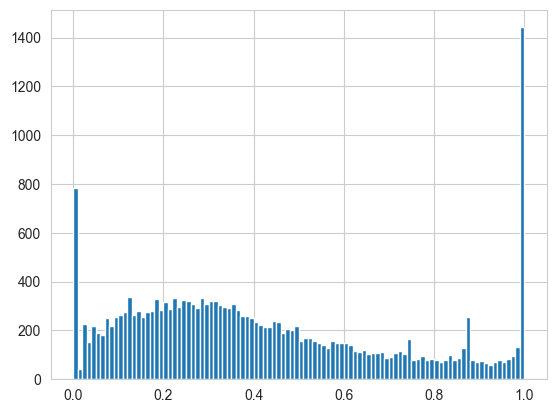

In [34]:
soft_label['protein_probability'].hist(bins=100)

In [35]:
soft_label.to_csv('soft_label.csv', index=False)

In [20]:
file_0981 = pd.read_csv('SG_combined_protein_0981_with_protein_probability.csv')

In [37]:
file_0981_with_soft_label = pd.merge(file_0981, soft_label, on='protein.Accession', suffixes=('', '_soft_label'))

In [38]:
file_0981_with_soft_label.to_csv('SG_combined_protein_0981_with_soft_label.csv', index=False)